<h3>Logistic Regression</h3>

In [1]:
# Logistic Regression
# Logistic regression is a type of regression that predicts a probability of an outcome
# given one or more independent variables.

# This in turn can be used for classification (predicting categories)
# Logistic regression is trained on an output variable that is discrete (a binary 1 or 0) or a 
# categorical number (which is a whole number)

# Regression methods have become an integral component of any data analysis concerned with
# describing the relationship between a response variable and a one or more explanatory variables.

# The goal of an analysis using this model is the same as that of any regression model used
# in statistics, that is to find the best fitting and most parsimonious, clinically interpretable
# model to describe the relationship between the outcome (dependent or response) variable 
# and a set of independent (predictor or explanatory) variables.

# What distinguishes a logistic regression model from the linear model is that the
# outcome variable in logistic regression is binary or dichotompous.

<h3>Performing a logistic regression</h3>

In [2]:
# Performing a logistic regression
# The logistic regression is an S-shaped curve (also known as a sigmoid curve)
# that, for a given set of input variable between 0 and 1.
# Because the output variable is between 0 and 1 it can be used to represent a probability.

# The (b0 + b1x) component in the logistic function is known as a log-odds function.
# Like linear regression, we can also extend the logistic regression to more
# than one input variable (x1, x2, ..., xn)

In [3]:
# A logistic function
import math
def predict_probability(x, b0, b1):
    p = 1.0 / (1.0 + math.exp(-(b0 + b1*x)))
    return p

1.0/(1.0 + 16.8272567955368*exp(-0.62*x))


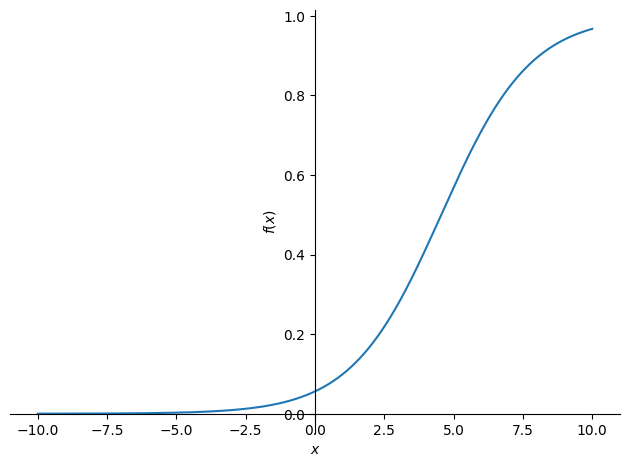

In [4]:
# Assume b0 = -2.823 and b1 = 0.62
# Plotting function
from sympy import *
b0, b1, x = symbols('b0 b1 x')
p = 1.0/(1.0 + exp(-(b0 + b1*x)))
p = p.subs(b0, -2.823)
p = p.subs(b1, 0.620)

print(p)
plot(p);

In [5]:
# Fitting the logistic curve
# The data can be have any mix of decimal, integer and binary variables,
# but the output variable must be binary (0 or 1)

In [6]:
# When we do a prediction, the output variable values will be between 0 and 1, resembling a probability.

In [7]:
# using sckitlearn
import pandas as pd
from sklearn.linear_model import LogisticRegression

# Load the data
df = pd.read_csv('https://bit.ly/33ebs2R', delimiter=',')

# Extract input variables (all rows, all columns but last column)
X = df.values[:, :-1]

# Extract output column (all rows, last column)
Y = df.values[:, -1]

# Perform logistic regression
# Turn off penalty

model = LogisticRegression(penalty=None)
model.fit(X, Y)

# Print beta1
print(model.coef_.flatten())

# print beta0
print(model.intercept_.flatten())

[0.69268939]
[-3.17580504]


In [8]:
# Flattening means collapsing a matrix of numbers into a lesser dimension,
# particularly when there are fewer elements than there are dimensions.

<h3>Maximum Likelihood and Gradient Descent</h3>

In [9]:
# MAXIMUM LIKELIHOOD AND GRADIENT DESCENT
# Maximum Likelihood estimation, MLE maximizes the likelihood a given
# logistic curve would output the observed data. Essentially, the
# idea is to find the b0 and b1 coeficients that bring our logistic curve
# to those points as closely as possible,
# indicating it is the most likely to have produced those points.

<h4>Joint Likelihood</h4>

In [10]:
# Joint likelihood
# Calculating the joint likelihood of observing all the points for a given
# logistic regression

# This example uses a patient dataset that contains data on the chemical
# exposure duration and the symptomatic status of a person.
import math
import pandas as pd
patient_data = pd.read_csv('https://bit.ly/33ebs2R', delimiter=',').itertuples()
b0 = -3.1756395
b1 = 0.69267212

def logistic_function(x):
    p = 1.0 / (1.0 + math.exp(-(b0 + b1*x)))
    return p

# Calculate the joint likelihood
joint_likelihood = 1.0

for p in patient_data:
    if p.y == 1.0:
        joint_likelihood *= logistic_function(p.x)
    elif p.y == 0.0:
        joint_likelihood *= (1.0 - logistic_function(p.x))

print(joint_likelihood)

4.7911178996451175e-05


In [11]:
# modified version
# Since a point is either y=0 or y=1, we can use binary elimination with x^(y) or x(1-y) 
for p in patient_data:
    joint_likelihood *= (logistic_function(p.x) ** p.y) * ((1.0 - logistic_function(p.x))**(1.0-p.y))
print(joint_likelihood)

4.7911178996451175e-05


In [12]:
# Using logarithmic addition
# Calculate the joint likelihood

# This dosen't result to the right result.
import numpy as np
joint_likelihood = 0.0
for p in patient_data:
    joint_likelihood += math.log(logistic_function(p.x))*(p.y) + \
                        math.log(1.0 - logistic_function(p.x))*(1.0 - p.y)
                        # math.log(logistic_function(p.x) ** p.y * (1.0 - logistic_function(p.x)) ** (1.0 - p.y))
joint_likelihood = math.exp(joint_likelihood)
print(joint_likelihood)

1.0


In [13]:
# Using gradient descent on logistic regression
from sympy import *
import pandas as pd

points = list(pd.read_csv('https://tinyurl.com/y2cocoo7').itertuples())

b1, b0, i, n = symbols('b1 bo i n')
x, y = symbols('x y', cls=Function)

joint_likelihood = Sum(log(
    (1.0 / (1.0 + exp(-(b0 + b1*x(i)))))**y(i) \
                           * (1.0 - (1.0 / (1.0 + exp(-(b0 + b1*x(i)))))) ** (1 - y(i))),
                      (i, 0, n)
                      )
# Partial derivatives for m, with points sunstituted
d_b1 = diff(joint_likelihood, b1) \
        .subs(n, len(points) - 1).doit() \
        .replace(x, lambda i: points[i].x) \
        .replace(y, lambda i: points[i].y)

# Partial derivative for m, with points substituted
d_b0 = diff(joint_likelihood, b0) \
        .subs(n, len(points) - 1).doit() \
        .replace(x, lambda i: points[i].x) \
        .replace(y, lambda i: points[i].y)

# Compile using lambdify for faster computation
d_b1 = lambdify([b1, b0], d_b1)
d_b0 = lambdify([b1, b0], d_b0)

# Perform gradient descent
b1 = 0.01
b0 = 0.01
L = 0.01

for i in range(10_000):
    b1 += d_b1(b1, b0) * L
    b0 += d_b0(b1, b0) * L

print(b1, b0)

0.6926693075370812 -3.175751550409821


<h3>Multivariable Logistic Regression</h3>

In [14]:
# Multivariable Logistic Regression
# Example: Predict employee quit
import pandas as pd
from sklearn.linear_model import LogisticRegression
employee_data = pd.read_csv('https://tinyurl.com/y6r7qjrp')

# grab independent variable columns
inputs = employee_data.iloc[:, :-1]

# grab dependent 'did_quit' variable column
output = employee_data.iloc[:, -1]

# Build logistic regression
fit = LogisticRegression(penalty=None).fit(inputs, output)

# print coefficients
print('Coefficients: {0}'.format(fit.coef_.flatten()))
print('Intercept: {0}'.format(fit.intercept_.flatten()))

# Interact and test new employee data
def predict_employee_will_stay(sex, age, promotions, years_employed):
    prediction = fit.predict(
        [[sex, age, promotions, years_employed]]
    )
    probabilities = fit.predict_proba(
    [[sex, age, promotions, years_employed]]
    )

    if prediction == [[1]]:
        return 'WILL LEAVE: {0}'.format(probabilities)
    else:
        return 'WILL STAY: {0}'.format(probabilities)

# Test a prediction
# while True:
# n = input('Predict employee will stay or leave {sex}, {age}, {promotions}, {years_employed}: ')
# (sex, age, promotions, years_employed) = n.split(', ')
# print(predict_employee_will_stay(int(sex), int(age), int(promotions), int(years_employed)
#                                 ))

Coefficients: [ 0.03216405  0.03683014 -2.50414075  0.97423186]
Intercept: [-2.73503136]


<h3>Understanding log-odds</h3>

In [15]:
# Understanding log-odds
# Explore more on this.

<h3>R-Squared Value</h3>

In [16]:
# R-Squared value for logistic Regression

In [17]:
# Calculating the log likelihood of the fit
from math import log, exp
import pandas as pd

patient_data = pd.read_csv('https://bit.ly/33ebs2R',
                           delimiter=',').itertuples()

b0 = -3.17576395
b1 = 0.69267212

def logistic_function(x):
    p = 1.0 / (1.0 + exp(-(b0 + b1*x)))
    return p

# sum the log-likelihoods
log_likelihood_fit = 0.0

# for p in patient_data:
#     if p.y == 1.0:
#         log_likelihood_fit += log(logistic_function(p.x))
#     elif p.y == 0.0:
#         log_likelihood_fit += log(1.0 - logistic_function(p.x))

# Consolidating the log likelihood logic into a single line
log_likelihood_fit = sum(log(logistic_function(p.x))*(p.y) + log(1.0 - logistic_function(p.x))*(1.0 - p.y) for p in patient_data)

print(log_likelihood_fit)

-9.946161673231579


In [18]:
# log like_lihood of patients
import pandas as pd
from math import log, exp
patient_data = list(pd.read_csv('https://bit.ly/33ebs2R',
                                delimiter=',').itertuples())

likelihood = sum(p.y for p in patient_data) / len(patient_data)
log_likelihood = 0.0
# for p in patient_data:
#     if p.y == 1.0:
#         log_likelihood += log(likelihood)
#     elif p.y == 0.0:
#         log_likelihood += log(1-likelihood)

# consolidating the log likelihood into a single line
log_likelihood = sum(log(likelihood)*p.y + log(1.0-likelihood)*(1.0 - p.y) for p in patient_data)

print(log_likelihood)

-14.341070198709906


In [19]:
# Calculating the R2 for a logistic Regression
import pandas as pd
from math import log, exp
patient_data = list(pd.read_csv('https://bit.ly/33ebs2R',
                                delimiter=',').itertuples())

# Declare fitted logistic regression
b0 = -3.17576395
b1 = 0.69267212

def logistic_function(x):
    p = 1.0 / (1.0 + exp(-(b0 + b1*x)))
    return p


# Calculate the log likelihood of the fit
log_likelihood_fit = sum(log(logistic_function(p.x))*p.y + \
                         log(1.0-logistic_function(p.x))*(1.0-p.y) \
                         for p in patient_data)

# Calculate R-Squared
r2 = (log_likelihood - log_likelihood_fit) / log_likelihood
print(r2)

0.3064561057565762


In [20]:
# R2 is too low thus hours of exposure is mediocre for predicting symptoms.

In [21]:
# P-value
# P-value helps investigate how likely we would have seen this data by chance
# rather than because of actual relationship

In [22]:
# chi-Square distribution, X2 is a probability distribution.

# In our case, X2 = 2(log likelihood fit) - (log likelihood)
# We then take that value and lookup the probability from the X2 distribution.
# p_value = chi(2(log likelihood fit) - (log likelihood))

In [23]:
# Calculating a p-value for a given logistic regression
import pandas as pd
from math import log, exp
from scipy.stats import chi2

patient_data = list(pd.read_csv('https://bit.ly/33ebs2R',
                                delimiter=',').itertuples())

# Declare fitted logistic regression
b0 = -3.17576395
b1 = 0.69267212

def logistic_function(x):
    p = 1.0 / (1.0 + exp(-(b0 + b1*x)))
    return p

# Calculate the log likelihood of the fit
log_likelihood_fit = sum(log(logistic_function(p.x))*p.y +
                         log(1.0 - logistic_function(p.x))*(1.0 - p.y)
                         for p in patient_data)

# Calculate the log likelihood without fit
likelihood = sum(p.y for p in patient_data) / len(patient_data)
log_likelihood = sum(log(likelihood)*p.y +
                     log(1.0 - likelihood) * (1.0-p.y)
                     for p in patient_data)

# calculate p-value
chi2_input = 2*(log_likelihood_fit - log_likelihood)
p_value = chi2.pdf(chi2_input, 1) # 1 degree of freedom (n-1)

print(p_value)

0.0016604875618753726


In [24]:
# We have a p-value of 0.000166, and if our threshold for significance is 0.05, we say
# this data is statistically significant and was not by random chance.

<h3>Train/Test Split</h3>

In [25]:
# Train/Test Split
# Three-Fold Cross-validation

In [26]:
# Perform a logistic regression on the employee-retention dataset,
# split the data into thirds. We then alternate each third as the testing data.
# We average the three mean and standard deviation values for each fold

import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, cross_val_score

# Load the data
df =pd.read_csv('https://tinyurl.com/y6r7qjrp',
                 delimiter=',')

# Inputs
X = df.values[:, :-1]
Y = df.values[:, -1]

# 'random_state' is the random seed, which we fix to 7
kfold = KFold(n_splits=3,
              random_state=7,
              shuffle=True)

model = LogisticRegression(penalty=None)
# results = cross_val_score(
#     model, X, Y, cv=kfold)
# print('Accurancy Mean: % .3f stdev: %.3f'%(results.mean(), results.std()))

# Using AUC value score
results = cross_val_score(model, X, Y, cv=kfold, scoring='roc_auc')
print('AUC: %.3f(%.3f)'%(results.mean(), results.std()))

AUC: 0.814(0.056)


In [31]:
# Creating a confusion matrix
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

# Load the data
df = pd.read_csv('https://bit.ly/3cManTi',
                 delimiter=',')

# Extract input variables (all rows, all columns but last column)
X = df.values[:, :-1]

# Extract output column (all rows, last column)
Y = df.values[:, -1]

model = LogisticRegression(solver='liblinear')
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.33,
                                                    random_state=10,
                                                   # Using stratify to overcome class imbalances in Y columns
                                                    stratify=Y
                                                   )
model.fit(X_train, Y_train)
prediction = model.predict(X_test)

"""
The confusion matrix evaluates accuracy within category
[[truepositives falsenegatives]
 [falsepositives truenegatives]]

The diagonal represents correct predictions, so we want those to be higher
"""
matrix = confusion_matrix(y_true=Y_test,
                          y_pred=prediction)
print(matrix)

[[6 4]
 [5 3]]


In [28]:
# NOTE: Read and learn more about Bayes Theorem and conditional probabilities

<h3>Reciever Operator Characteristics | Area Under Curve</h3>

In [30]:
# RECIEVER OPERATOR CHARACTERISTICS | AREA UNDER CURVE
# When we are evaluating different machine learning configurations, we may end up
# with dozens, hundreds or thousands of confusion matrices

# A Reciever Operator Characteristics (ROC) curve helps us to see each testing
# instance (each represented by a black dot) and find an agreeable balance between
# the positives and false positives

# We can also comapre different machine learning models by creating 
# separate ROC for each.
# The area under the curve (AUC) is a good metric for choosing which model to use.

# CLASS IMBALANCE
# class imbalance happens when data is not equally represented across every outcome class.
# Unfortunatly, many problems of interest are imbalanced, such as disease prediction, security
# breaches, fraud detection, etc

# OVERCOMING CLASS IMBALANCE
# Collect more data
# Try different models as well as confusion matrices, ROC/AUC curves
# Duplicate samples in the minority class until it is equally represented in the dataset. This is also known as data argumentation.

# In Sciktlear, stratify can be used on the imbalanced column to generate
# duplicate samples until the data in that column is balanced.

<h3>Coronary Heart Disease (CHD) and AGE</h3>
<p>It is of interest to explore the relationship between AGE and the
presence (1) or absence (0) of CHD in a group.</p>

In [35]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [36]:
dfCHD = pd.read_csv('../Data/CHDdata.csv')
dfCHD.head()

,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
0,160,12.00,5.73,23.11,Present,49,25.30,97.20,52,1
1,144,0.01,4.41,28.61,Absent,55,28.87,2.06,63,1
2,118,0.08,3.48,32.28,Present,52,29.14,3.81,46,0
3,170,7.50,6.41,38.03,Present,51,31.99,24.26,58,1
4,134,13.60,3.50,27.78,Present,60,25.99,57.34,49,1


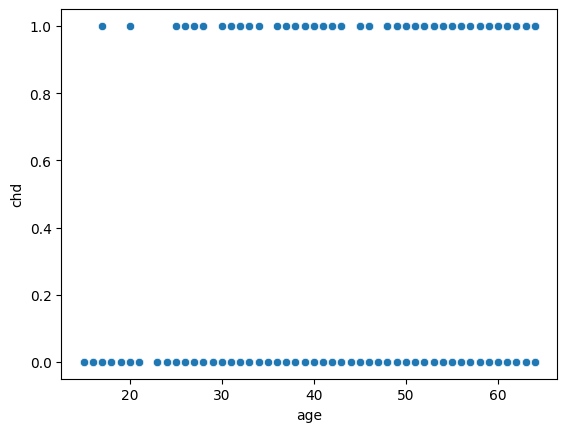

In [38]:
sns.scatterplot(dfCHD, x='age', y='chd');
# Plotting a scatter plot

In [47]:
dfCHD['age'].unique()

array([52, 63, 46, 58, 49, 45, 38, 29, 53, 60, 40, 17, 15, 62, 59, 20, 44,
       50, 42, 48, 61, 56, 41, 28, 32, 30, 51, 33, 16, 31, 18, 57, 54, 27,
       26, 36, 34, 55, 39, 21, 64, 37, 25, 43, 24, 47, 23, 35, 19])

In [74]:
dfCHD['AGEGRP'] = pd.cut(dfCHD['age'],
                            bins=[10, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65],
                            right=False,
                            # retbins=True,
                            include_lowest=True,
                           )
dfCHD['Expected Mean'] = dfCHD.groupby(['AGEGRP'],
             observed=True)['chd'].mean(
             ).reset_index(
    
             )['chd']

,AGEGRP,chd
0,"[10, 20)",0.020000
1,"[20, 25)",0.058824
2,"[25, 30)",0.147059
3,"[30, 35)",0.261905
4,"[35, 40)",0.303030
5,"[40, 45)",0.313725
6,"[45, 50)",0.309091
7,"[50, 55)",0.560000
8,"[55, 60)",0.590909
9,"[60, 65)",0.500000


In [ ]:
dfCHD